As detailed in Issue [#14](https://github.com/IQcollaboratory/galpopFM/issues/14), there's a significant number of galaxes with a fixed FUV - NUV color. What's causing this feature in the data? 

In [1]:
import os
import h5py 
import numpy as np 
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
dat_dir = os.environ['GALPOPFM_DIR']

In [3]:
fsdss = os.path.join(dat_dir, 'obs', 'tinker_SDSS_centrals_M9.7.valueadd.hdf5') 
sdss = h5py.File(fsdss, 'r') 

$M_r$ complete sample that have FUV and NUV values

In [6]:
mr_complete = (sdss['mr_tinker'][...] < -20.)
has_uv = ((sdss['ABSMAG'][...][:,0] != -999) & (sdss['ABSMAG'][...][:,1] != -999))
print('%i galaxies do not have UV' % (np.sum(mr_complete & ~has_uv)))

cuts = mr_complete & has_uv
print('%i galaxies' % np.sum(cuts))

38 galaxies do not have UV
3548 galaxies


In [7]:
Fmag    = sdss['ABSMAG'][...][:,0][cuts]
Nmag    = sdss['ABSMAG'][...][:,1][cuts]
Rmag    = sdss['mr_tinker'][...][cuts]
Gmag    = sdss['mg_tinker'][...][cuts]

FUV_NUV =  Fmag - Nmag
G_R = Gmag - Rmag 

In [25]:
logmstar = np.log10(sdss['ms_tinker'][...][cuts])
logssfr = sdss['sfr_tinker'][...][cuts]
logsfr = logssfr + logmstar

What's up with the FUV-NUV ~ 1.8

(-1.0, 5.0)

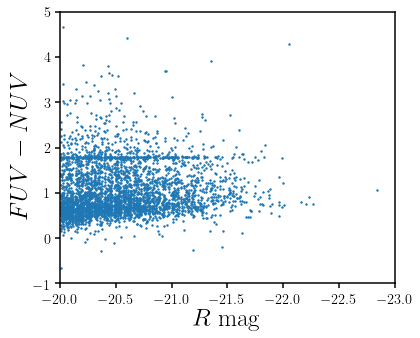

In [9]:
fig = plt.figure(figsize=(6,5))
sub = fig.add_subplot(111)
sub.scatter(Rmag, FUV_NUV, c='C0', s=2)
sub.set_xlabel('$R$ mag', fontsize=25)
sub.set_xlim(-20., -23)
sub.set_ylabel('$FUV-NUV$', fontsize=25)
sub.set_ylim(-1., 5.)

(-1.0, 5.0)

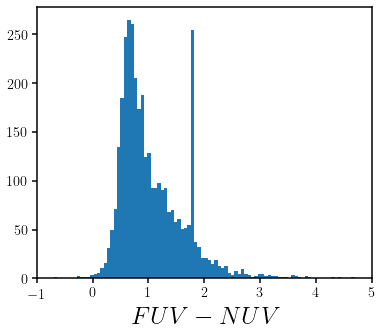

In [11]:
fig = plt.figure(figsize=(6,5))
sub = fig.add_subplot(111)
_ = sub.hist(FUV_NUV, range=(-1., 5.), bins=100)
sub.set_xlabel('$FUV-NUV$', fontsize=25)
sub.set_xlim(-1., 5.)

In [26]:
weird_FNUV = (FUV_NUV > 1.76) & (FUV_NUV < 1.82)
print('%i galaxies with very similar FUV-NUV color' % np.sum(weird_FNUV))

254 galaxies with very similar FUV-NUV color


In [27]:
FUV_NUV[weird_FNUV]

array([1.7899437 , 1.78936386, 1.80148506, 1.78915405, 1.81330299,
       1.77874565, 1.79136467, 1.7894516 , 1.77186966, 1.77422714,
       1.78751755, 1.77340889, 1.78381729, 1.78431892, 1.79137421,
       1.79182816, 1.76383495, 1.77920532, 1.7778511 , 1.76405239,
       1.80689621, 1.76468086, 1.79168701, 1.79154205, 1.81588554,
       1.79966927, 1.77958679, 1.79528427, 1.7765255 , 1.79582405,
       1.78591347, 1.78522873, 1.77731609, 1.78829956, 1.77278328,
       1.79359055, 1.78531647, 1.79411507, 1.79626083, 1.77986908,
       1.80396557, 1.78507805, 1.79294205, 1.79732323, 1.79939842,
       1.80728912, 1.79460907, 1.7921505 , 1.76593781, 1.78704643,
       1.77938461, 1.81108284, 1.7859726 , 1.76590347, 1.7839222 ,
       1.78253174, 1.79003525, 1.77209473, 1.78249359, 1.77209282,
       1.78253555, 1.81150627, 1.77436829, 1.81045437, 1.7622509 ,
       1.81169701, 1.78717995, 1.77981758, 1.77855396, 1.76951694,
       1.77638054, 1.79049683, 1.79391479, 1.78131294, 1.78211

The FUV-NUV are not repeated entries, which suggests this isn't an obvious bug. Lets see what kind of galaxies they are

(-15.0, -7.0)

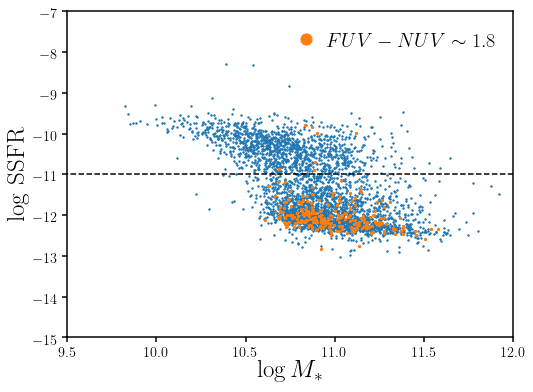

In [31]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logmstar, logssfr, c='C0', s=2)
sub.plot([9., 12.], [-11., -11.], c='k', ls='--')
sub.scatter(logmstar[weird_FNUV], logssfr[weird_FNUV], c='C1', s=5, label='$FUV-NUV \sim 1.8$')
sub.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(9.5, 12.)
sub.set_ylabel('$\log$ SSFR', fontsize=25)
sub.set_ylim(-15., -7)

Mainly quiescent, but not exclusively. They're not particularly skewed to galaxies with least SFR.

(-20.0, -10.0)

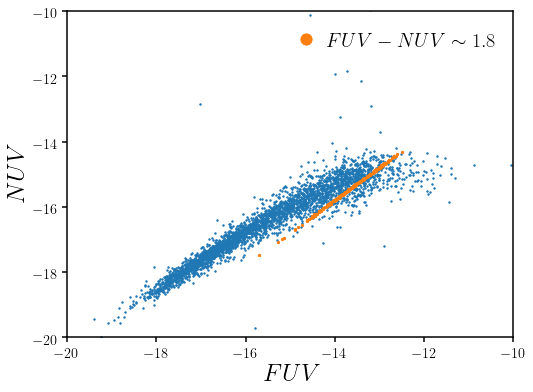

In [36]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(Fmag, Nmag, c='C0', s=2)
sub.scatter(Fmag[weird_FNUV], Nmag[weird_FNUV], c='C1', s=5, label='$FUV-NUV \sim 1.8$')
sub.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub.set_xlabel('$FUV$', fontsize=25)
sub.set_xlim(-20, -10.)
sub.set_ylabel('$NUV$', fontsize=25)
sub.set_ylim(-20., -10)

Besides lying on a straight line, nothing particularly unusual about their $FUV$ or $NUV$ magnitudes...